In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from ydata_profiling import ProfileReport
warnings.filterwarnings("ignore")

In [108]:
my_data=pd.read_csv("Admission_Predict.csv")
my_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [110]:
report=ProfileReport(my_data)
report.to_file("Admission_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
my_data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [4]:
my_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<Axes: >

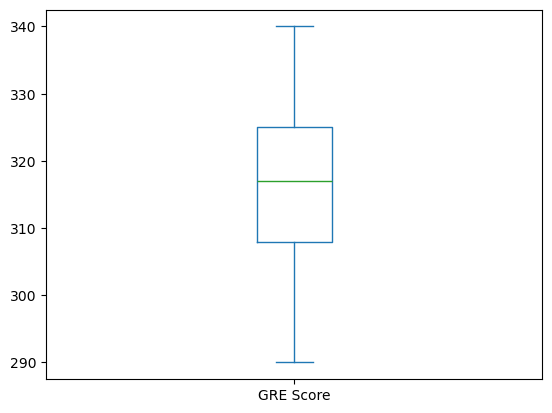

In [5]:
my_data["GRE Score"].plot.box()

In [6]:
my_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

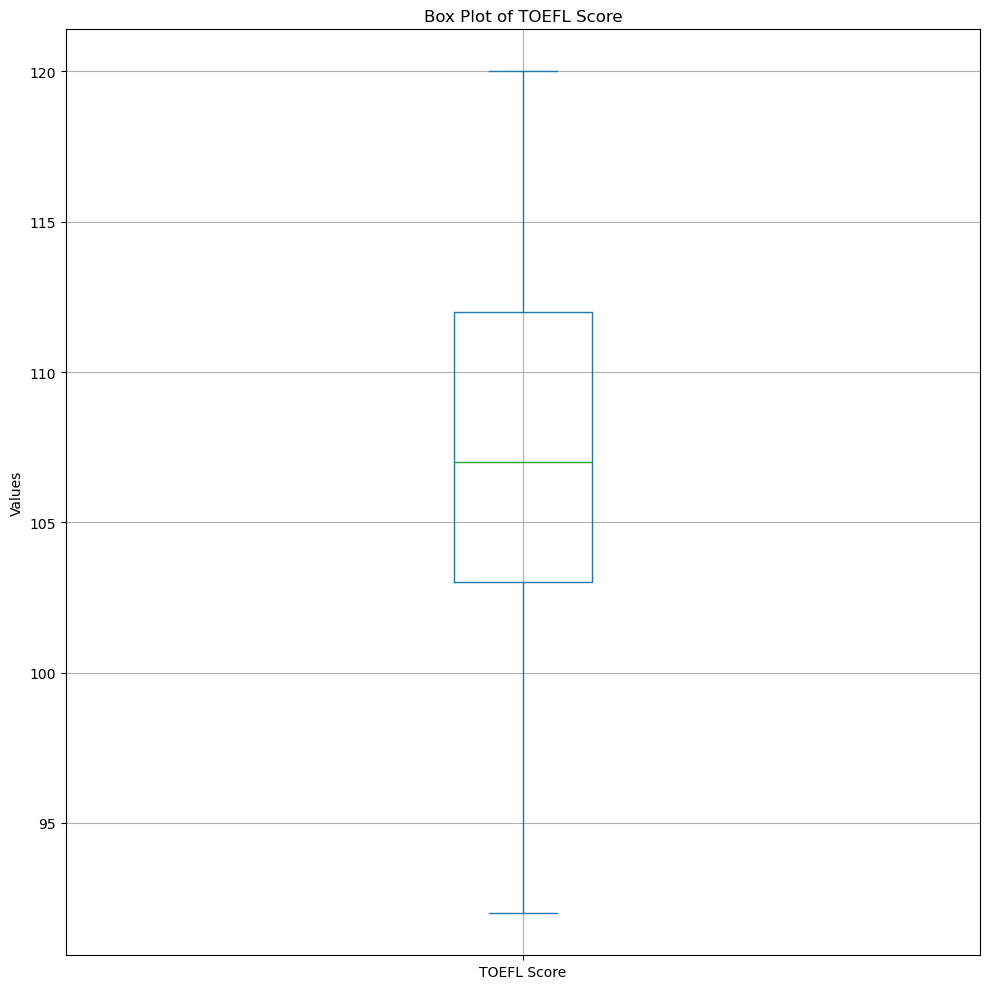

In [7]:
plt.figure(figsize=(10,10))
my_data["TOEFL Score"].plot(kind="box")
#my_data[col].plot(kind="box")
plt.title(f"Box Plot of TOEFL Score")
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()

In [8]:
def box_plot(col):
    plt.figure()
    my_data[col].plot(kind="box")
    plt.title(f"Box Plot of {col}")
    #plt.xlabel(col)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

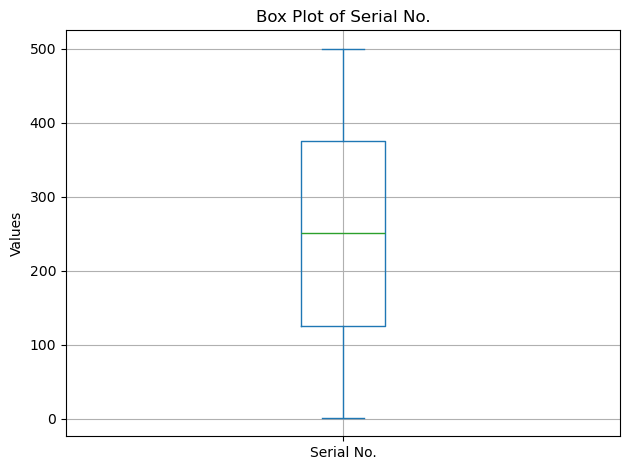

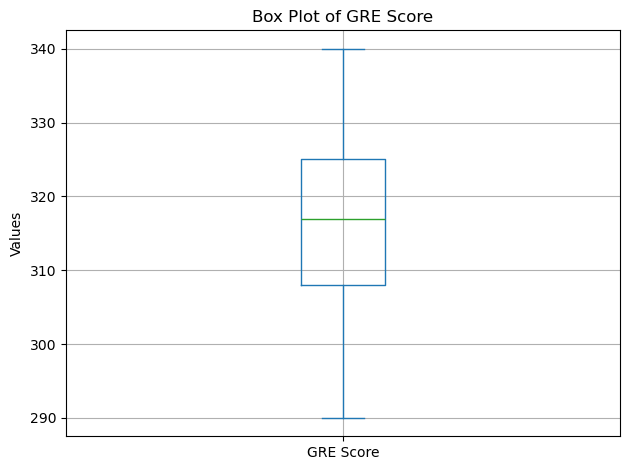

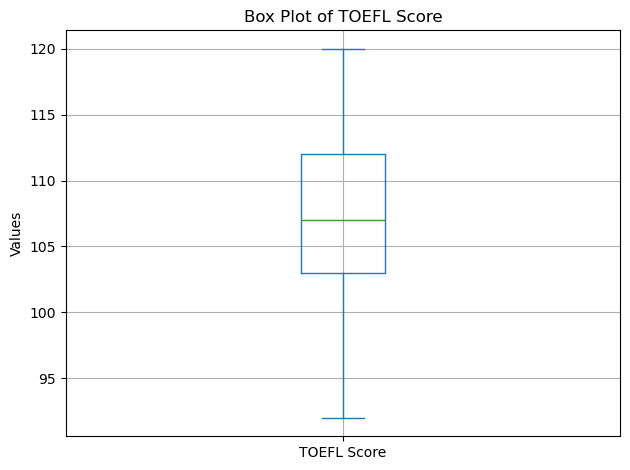

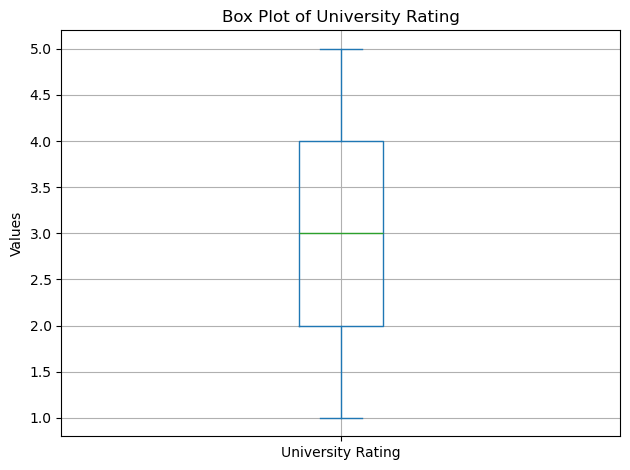

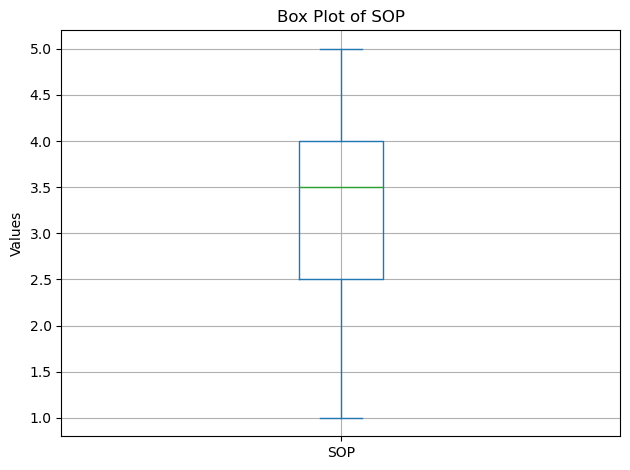

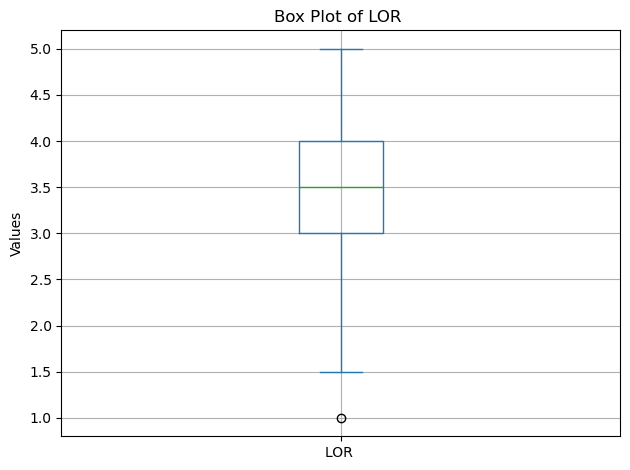

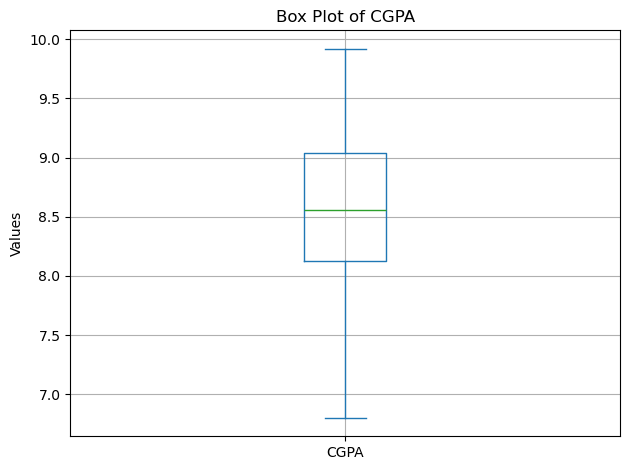

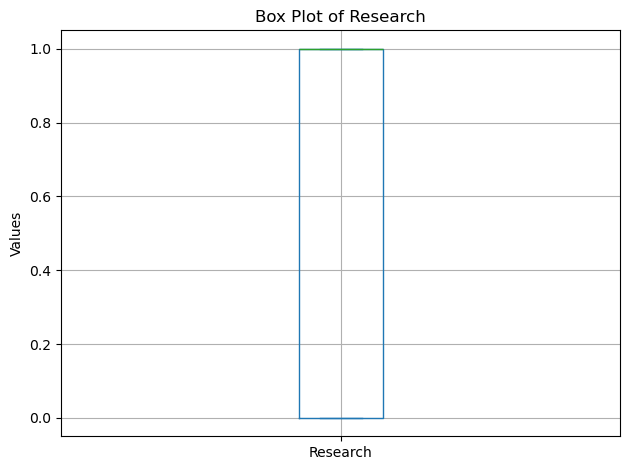

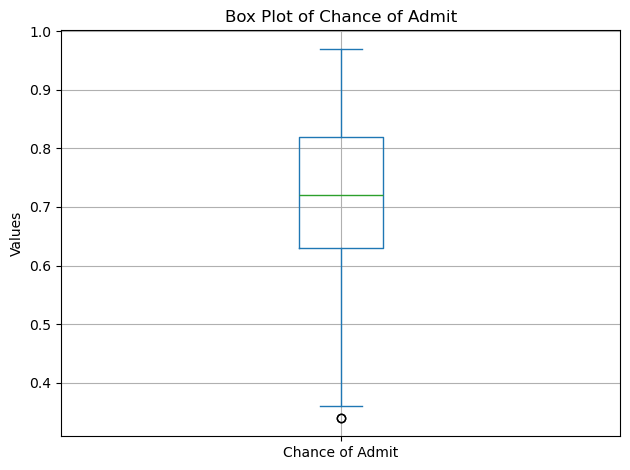

In [9]:
for col in my_data.columns:
    box_plot(col)

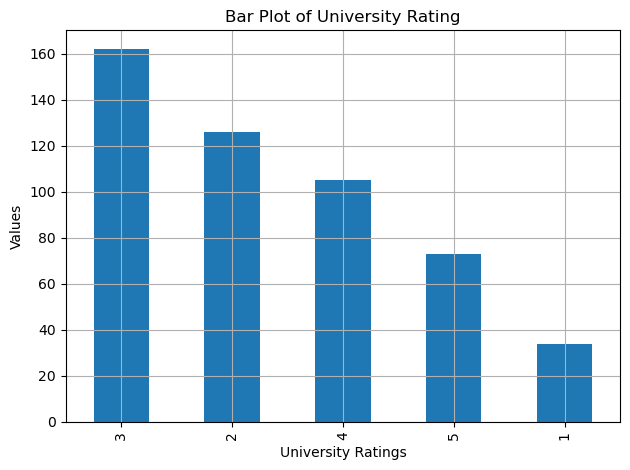

In [10]:
my_data["University Rating"].value_counts().plot(kind="bar")
plt.title(f"Bar Plot of University Rating")
plt.xlabel("University Ratings")
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()

In [11]:
def bar_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="bar")
    plt.title(f"Bar Plot of {col}")
    plt.xticks(fontsize=10)
    #plt.xlabel(col)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

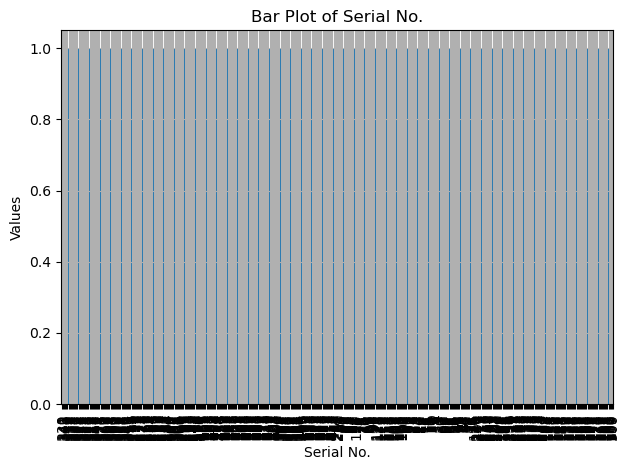

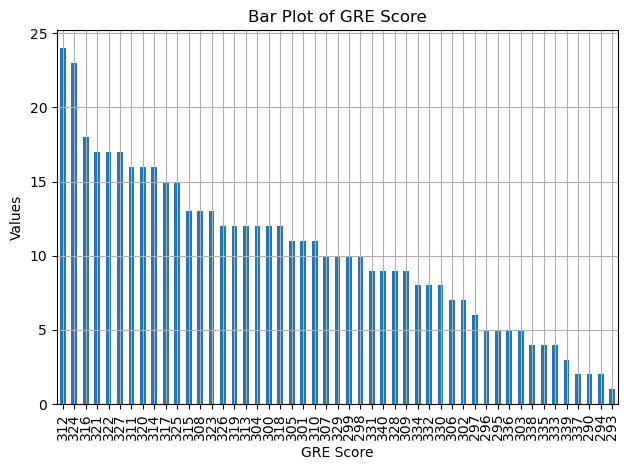

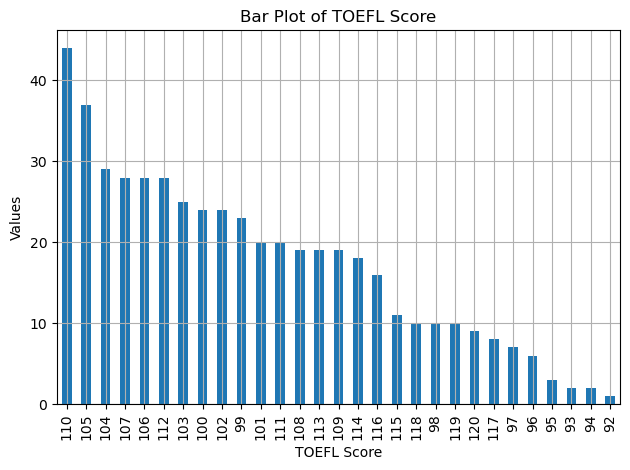

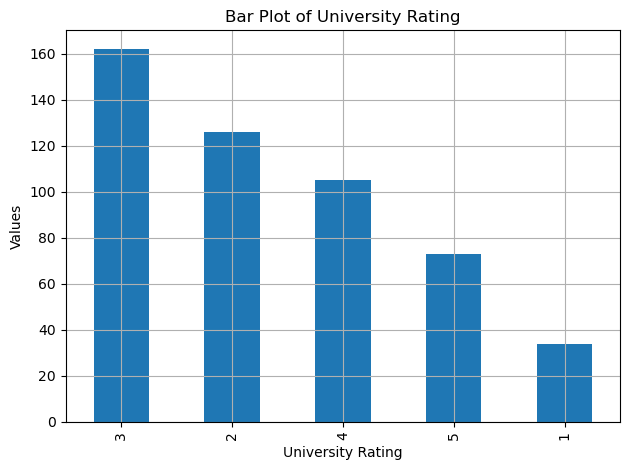

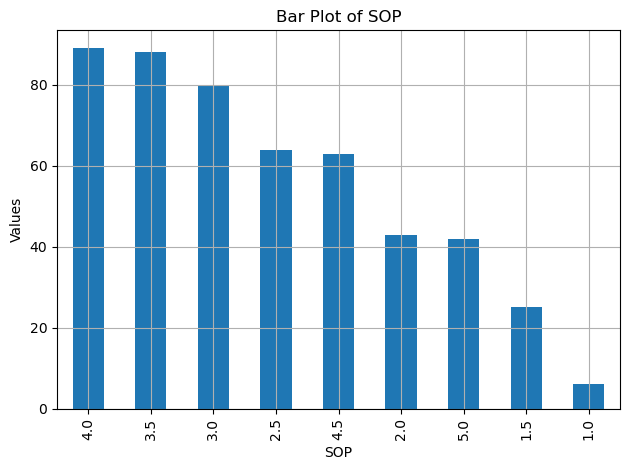

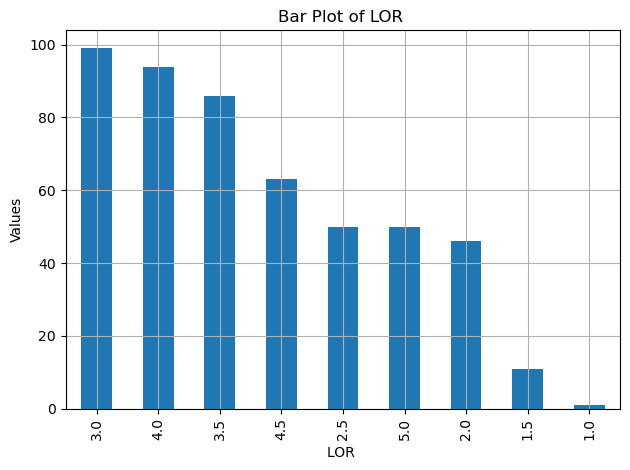

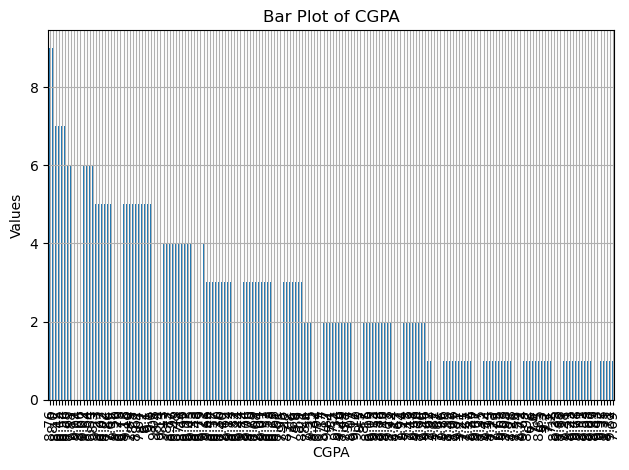

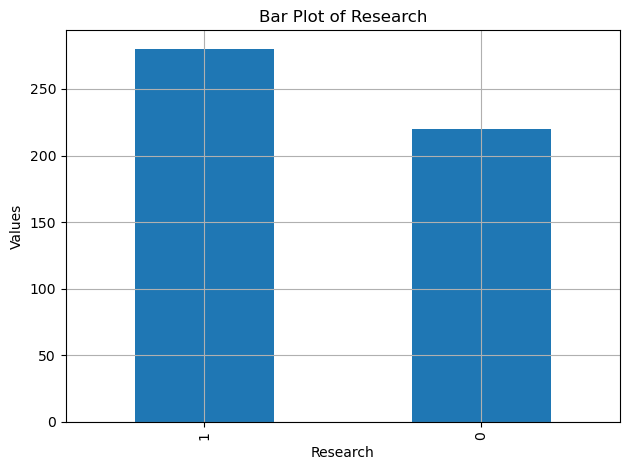

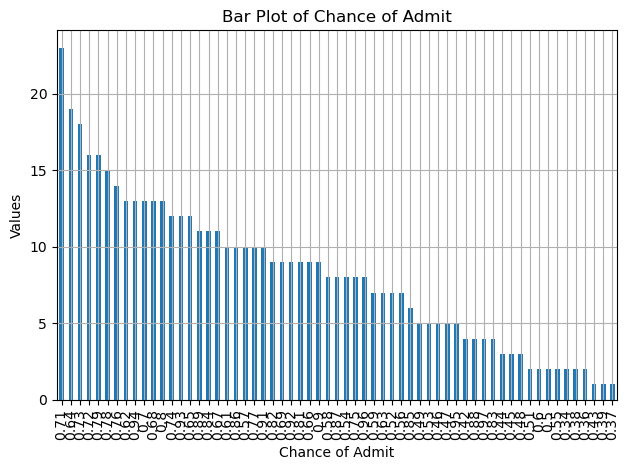

In [12]:
for col in my_data.columns:
    bar_plot(col)

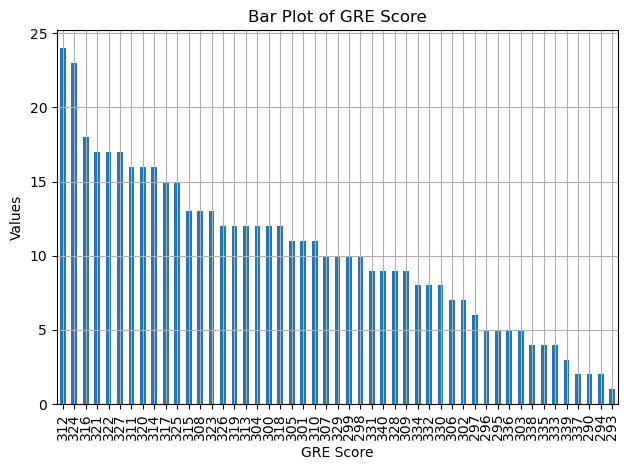

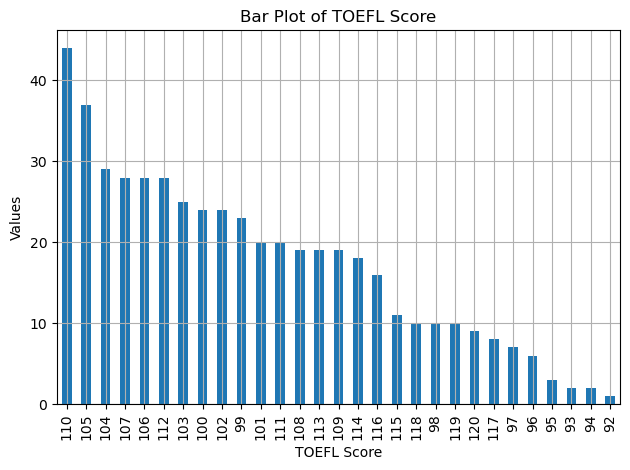

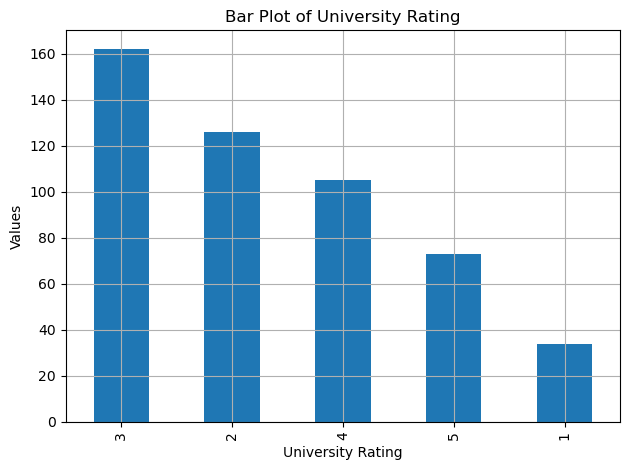

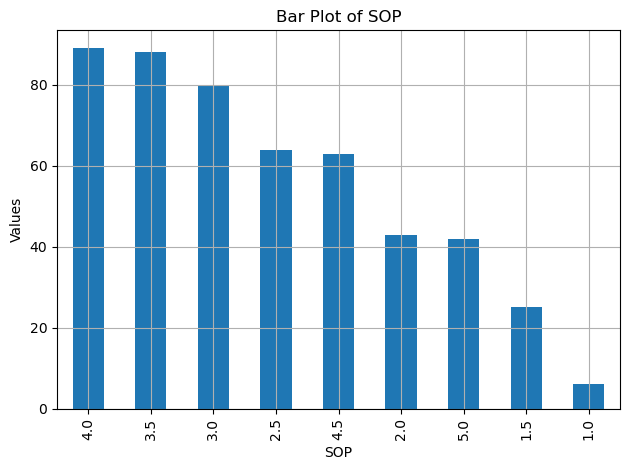

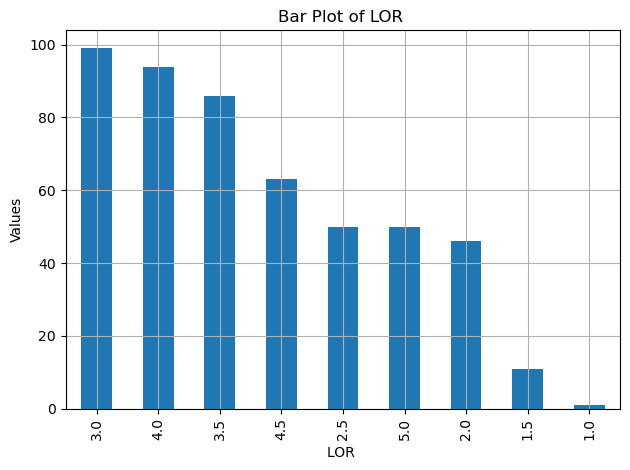

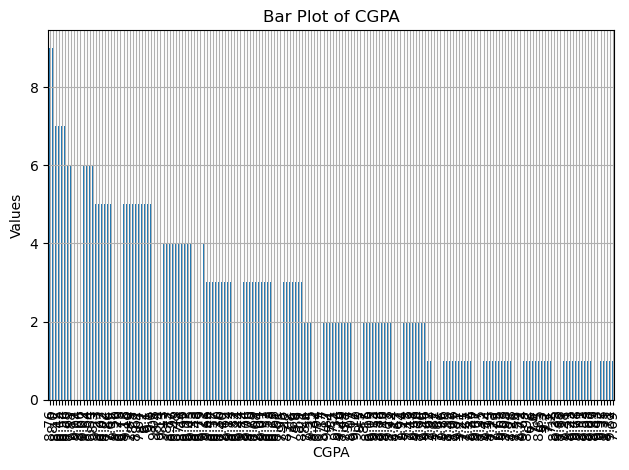

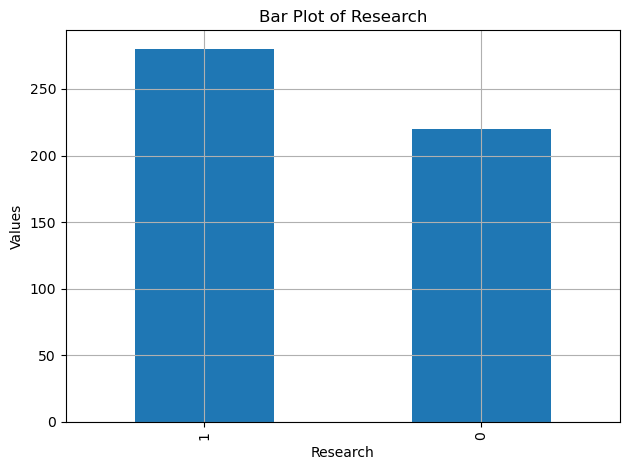

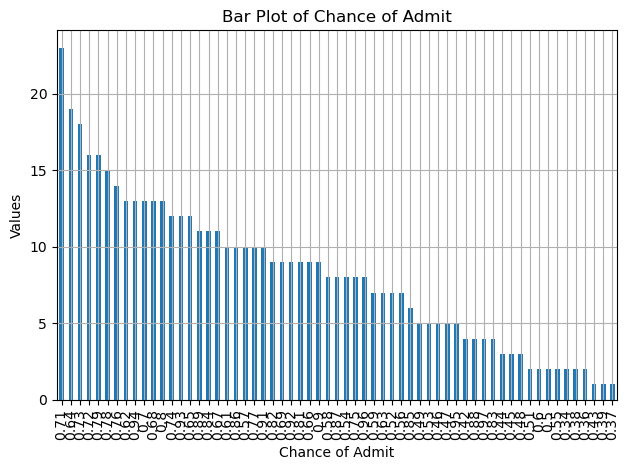

In [13]:
for col in ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit']:
    bar_plot(col)

In [14]:
def line_plot(col):
    plt.figure()
    my_data[col].value_counts().plot(kind="line")
    plt.title(f"line Plot of {col}")
    plt.xticks(fontsize=10)
    #plt.xlabel(col)
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

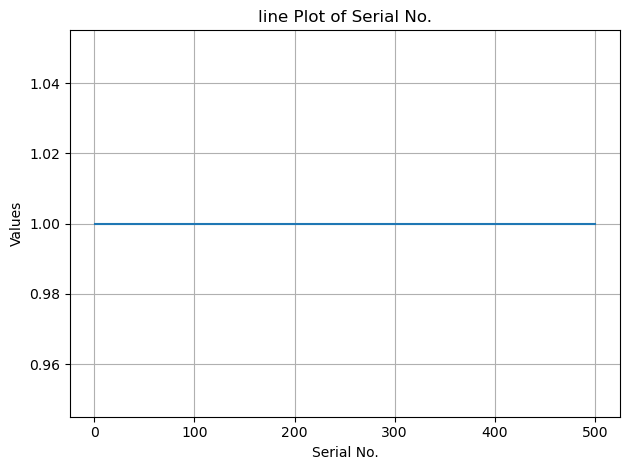

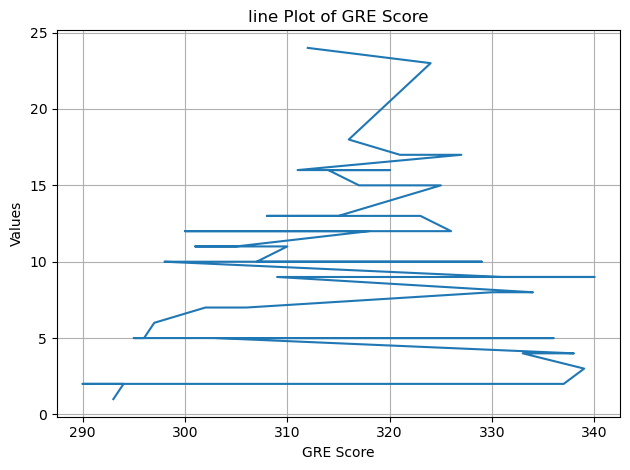

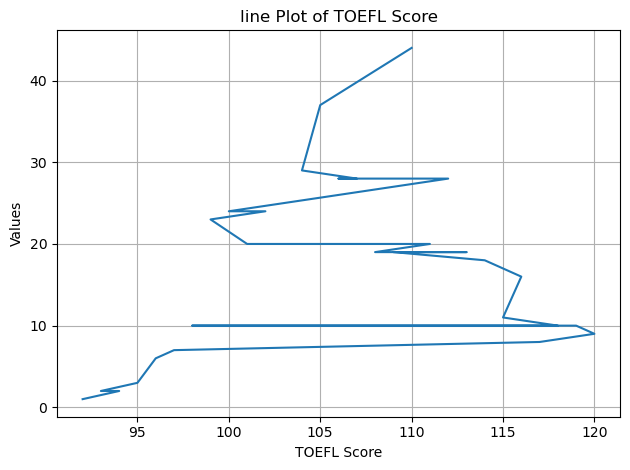

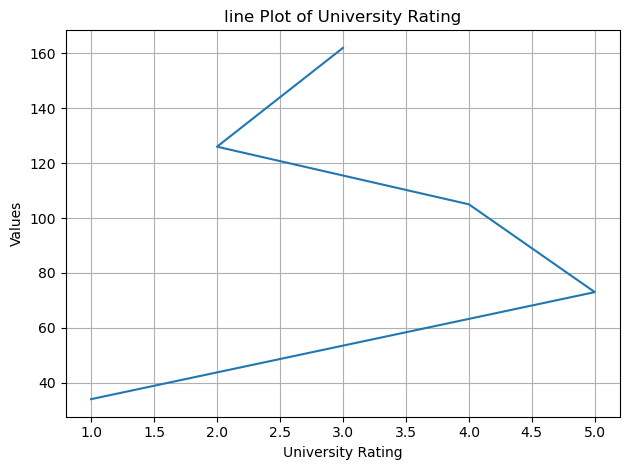

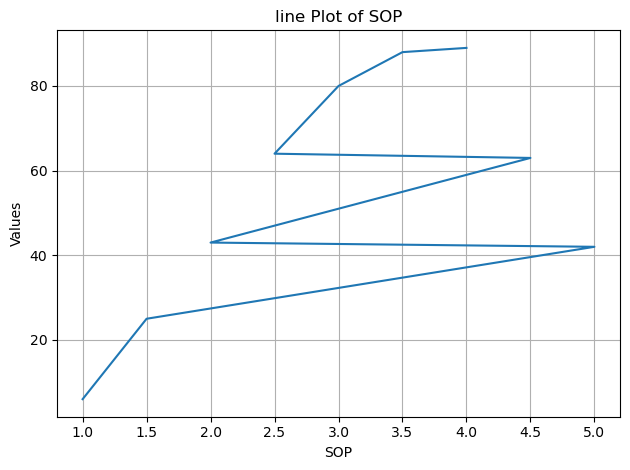

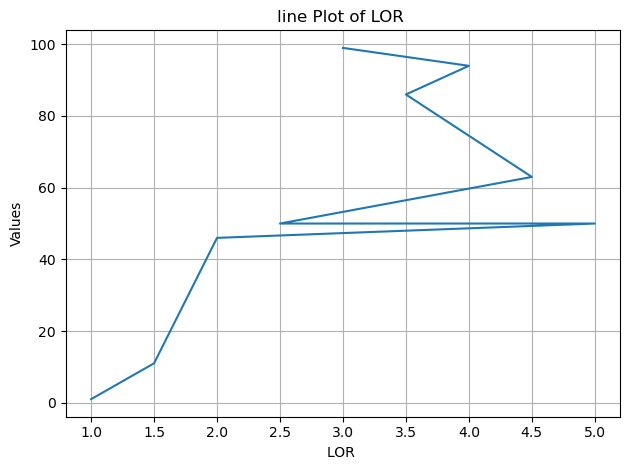

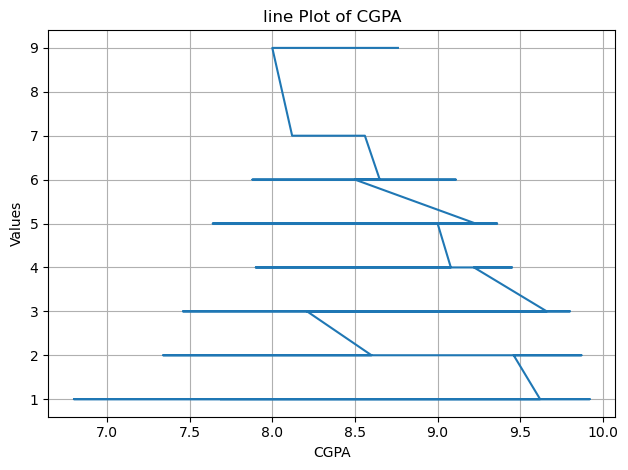

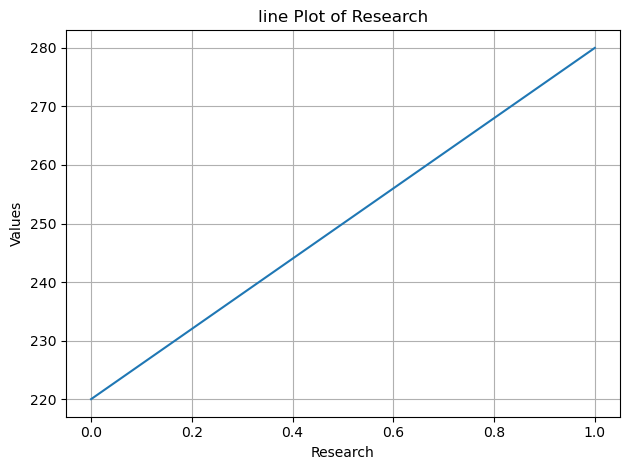

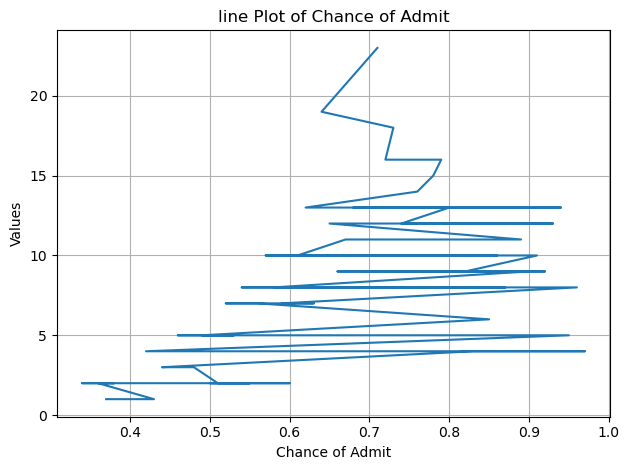

In [15]:
for col in my_data.columns:
    line_plot(col)

In [16]:
y=my_data["Chance of Admit"]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [17]:
x=my_data.drop(["Chance of Admit","Serial No."],axis=1)
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,shuffle=True)
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

x_train (350, 7)
y_train (350,)
x_test (150, 7)
y_test (150,)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model_lr=LinearRegression()
model_lr

LinearRegression()

In [22]:
model_lr.fit(x_train,y_train)

LinearRegression()

In [23]:
model_lr.predict(x_test)

array([0.65280328, 0.70945113, 0.93670057, 0.73146137, 0.81803279,
       0.66920636, 0.74796312, 0.71437662, 0.79220523, 0.66014296,
       0.66818041, 0.57365165, 0.79048746, 0.79275362, 0.77460648,
       0.85998859, 0.62886953, 0.75414155, 0.90227196, 0.67503422,
       0.62439904, 0.79448136, 0.83891151, 0.61190399, 0.78749169,
       0.57607235, 0.94963666, 0.64733575, 0.8623322 , 0.71522672,
       0.63363523, 0.81333335, 0.59677901, 0.90897556, 0.51109914,
       0.81966876, 0.67915838, 0.63348767, 0.65567508, 0.91162667,
       0.57351247, 0.66678197, 0.77751227, 0.96973634, 0.77804167,
       0.52364615, 0.65776846, 0.62852765, 0.66699699, 0.65395225,
       0.83381271, 0.91740807, 0.8826517 , 0.63003308, 0.75486868,
       0.65064233, 0.75191415, 0.60692357, 0.66696528, 0.70579381,
       0.44508726, 0.71440199, 0.74788172, 0.85051786, 0.97645415,
       0.61189214, 0.73736489, 0.78395854, 0.93164097, 0.70314242,
       0.60482269, 0.65415503, 0.82887293, 0.50120221, 0.92751

In [24]:
y_pred=model_lr.predict(x_test)
y_pred

array([0.65280328, 0.70945113, 0.93670057, 0.73146137, 0.81803279,
       0.66920636, 0.74796312, 0.71437662, 0.79220523, 0.66014296,
       0.66818041, 0.57365165, 0.79048746, 0.79275362, 0.77460648,
       0.85998859, 0.62886953, 0.75414155, 0.90227196, 0.67503422,
       0.62439904, 0.79448136, 0.83891151, 0.61190399, 0.78749169,
       0.57607235, 0.94963666, 0.64733575, 0.8623322 , 0.71522672,
       0.63363523, 0.81333335, 0.59677901, 0.90897556, 0.51109914,
       0.81966876, 0.67915838, 0.63348767, 0.65567508, 0.91162667,
       0.57351247, 0.66678197, 0.77751227, 0.96973634, 0.77804167,
       0.52364615, 0.65776846, 0.62852765, 0.66699699, 0.65395225,
       0.83381271, 0.91740807, 0.8826517 , 0.63003308, 0.75486868,
       0.65064233, 0.75191415, 0.60692357, 0.66696528, 0.70579381,
       0.44508726, 0.71440199, 0.74788172, 0.85051786, 0.97645415,
       0.61189214, 0.73736489, 0.78395854, 0.93164097, 0.70314242,
       0.60482269, 0.65415503, 0.82887293, 0.50120221, 0.92751

In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [26]:
mse=mean_squared_error(y_test,y_pred)
print(f"mean square error is {mse}")
rmse=sqrt(mse)
print(f"root mean squared error is {rmse}")

mean square error is 0.004125934236707799
root mean squared error is 0.06423343550447694


In [27]:
from sklearn.metrics import r2_score

In [28]:
r_squared=r2_score(y_test,y_pred)
print(f"R SQUARED IS {r_squared}")

R SQUARED IS 0.8157672116057979


In [29]:
# y=mx+c=constant
print(f"constant value is {model_lr.intercept_}")

constant value is -1.2161131174465978


In [30]:
print(f"slope m1,m2 and m3 {model_lr.coef_}")

slope m1,m2 and m3 [ 0.00165342  0.00381453  0.01012349 -0.00100952  0.01351732  0.10703419
  0.02813965]


In [31]:
import pickle
pickle.dump(model_lr,open("Admission_Predict.pkl","wb"))

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [33]:
select_models=[LinearRegression(),
              DecisionTreeRegressor(max_depth= None,min_samples_leaf= 2,min_samples_split= 5),
              RandomForestRegressor(max_depth= None,min_samples_leaf= 2,min_samples_split= 5,n_estimators= 100)]

In [34]:
my_rmse=[]
my_r_square=[]
for model in select_models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse}  and R Squared value {my_r_square} of model {model}")
    print(f"List of Rmse {my_rmse}")
    print("----------")
    print(f"List of R Square {my_r_square}")

RMSE value [0.06423343550447694]  and R Squared value [0.7489717706182806] of model LinearRegression()
List of Rmse [0.06423343550447694]
----------
List of R Square [0.7489717706182806]
RMSE value [0.06423343550447694, 0.09225136754983534]  and R Squared value [0.7489717706182806, 0.5442977729862502] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
List of Rmse [0.06423343550447694, 0.09225136754983534]
----------
List of R Square [0.7489717706182806, 0.5442977729862502]
RMSE value [0.06423343550447694, 0.09225136754983534, 0.07001096389054186]  and R Squared value [0.7489717706182806, 0.5442977729862502, 0.6884024252836928] of model RandomForestRegressor(min_samples_leaf=2, min_samples_split=5)
List of Rmse [0.06423343550447694, 0.09225136754983534, 0.07001096389054186]
----------
List of R Square [0.7489717706182806, 0.5442977729862502, 0.6884024252836928]


In [35]:
result=[my_rmse,my_r_square]
result

[[0.06423343550447694, 0.09225136754983534, 0.07001096389054186],
 [0.7489717706182806, 0.5442977729862502, 0.6884024252836928]]

In [36]:
pd.DataFrame(data=result,columns=["LR","DTC","RF"], index=["rmse","R Square"])

,LR,DTC,RF
rmse,0.064233,0.092251,0.070011
R Square,0.748972,0.544298,0.688402


In [37]:
my_rmse=[]
my_r_square=[]
adj_r2_square_value=[]
for model in select_models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=sqrt(mean_squared_error(y_pred,y_test))
    my_rmse.append(rmse)
    r_sq=r2_score(y_pred,y_test)
    my_r_square.append(r_sq)
    print(f"RMSE value {my_rmse}  and R Squared value {my_r_square} of model {model}")
    print(f"List of Rmse {my_rmse}")
    print("----------")
    print(f"List of R Square {my_r_square}")
    adj_r_squared_test=1 -(1-r_sq)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    print(f"{model},adj_r_squared_test")
    adj_r2_square_value.append(adj_r_squared_test)
    print(f"Adjusted R Square {adj_r2_square_value} of model {model}")
    print("---------")
    print(f"Adjusted R Square {adj_r2_square_value}")

RMSE value [0.06423343550447694]  and R Squared value [0.7489717706182806] of model LinearRegression()
List of Rmse [0.06423343550447694]
----------
List of R Square [0.7489717706182806]
LinearRegression(),adj_r_squared_test
Adjusted R Square [0.7365971395924211] of model LinearRegression()
---------
Adjusted R Square [0.7365971395924211]
RMSE value [0.06423343550447694, 0.08816251828089774]  and R Squared value [0.7489717706182806, 0.5905070759146429] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
List of Rmse [0.06423343550447694, 0.08816251828089774]
----------
List of R Square [0.7489717706182806, 0.5905070759146429]
DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5),adj_r_squared_test
Adjusted R Square [0.7365971395924211, 0.5703208050090267] of model DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)
---------
Adjusted R Square [0.7365971395924211, 0.5703208050090267]
RMSE value [0.06423343550447694, 0.08816251828089774, 0.07000741

In [38]:
result=[my_rmse,my_r_square,adj_r2_square_value]
result

[[0.06423343550447694, 0.08816251828089774, 0.07000741076079506],
 [0.7489717706182806, 0.5905070759146429, 0.6867414048009182],
 [0.7365971395924211, 0.5703208050090267, 0.6712990796854705]]

In [39]:
a=pd.DataFrame(data=result,columns=["LinearRegression","DecisionTreeRegressor","RandomForestRegressor"], index=["rmse","R Square","Adjusted R Square"])
a

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor
rmse,0.064233,0.088163,0.070007
R Square,0.748972,0.590507,0.686741
Adjusted R Square,0.736597,0.570321,0.671299


Text(0, 0.5, 'values')

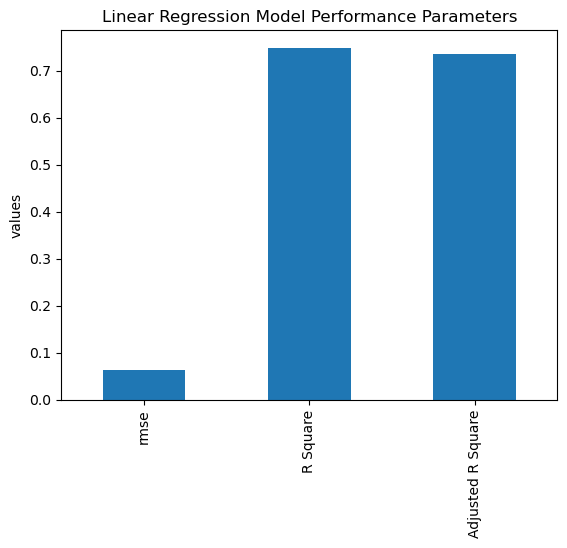

In [40]:
a.LinearRegression.plot(kind="bar")
plt.title("Linear Regression Model Performance Parameters")
plt.ylabel("values")

Text(0, 0.5, 'values')

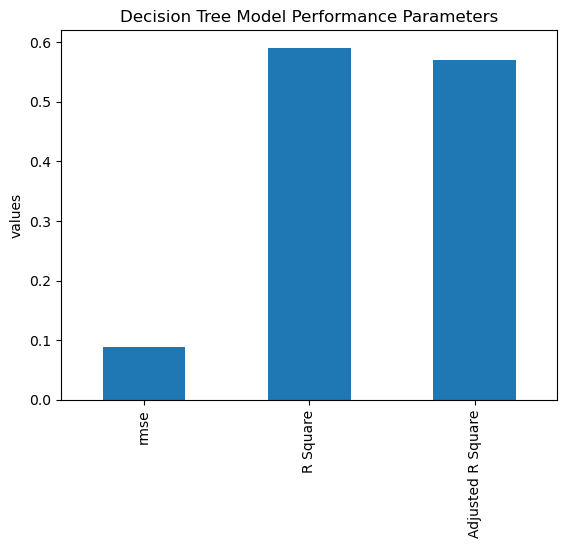

In [41]:
a.DecisionTreeRegressor.plot(kind="bar")
plt.title("Decision Tree Model Performance Parameters")
plt.ylabel("values")

Text(0, 0.5, 'values')

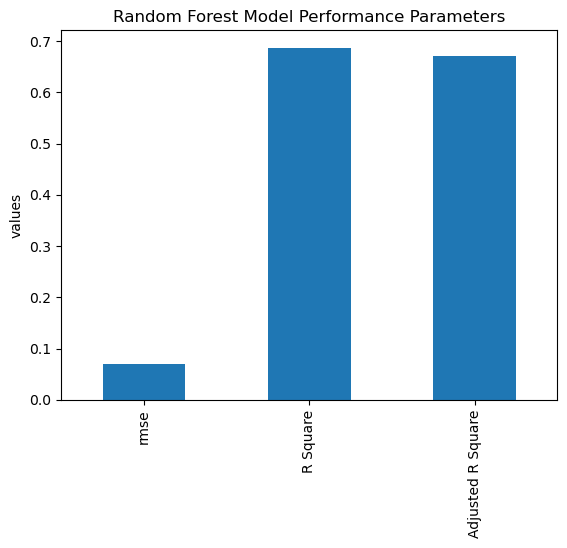

In [42]:
a.RandomForestRegressor.plot(kind="bar")
plt.title("Random Forest Model Performance Parameters")
plt.ylabel("values")

In [43]:
def my_model_plot(col):
    plt.figure()
    a[col].plot(kind="bar")
    plt.title(f"Model Performance Graph {col}")
    plt.ylabel("Values")
    plt.grid(True)
    plt.tight_layout()

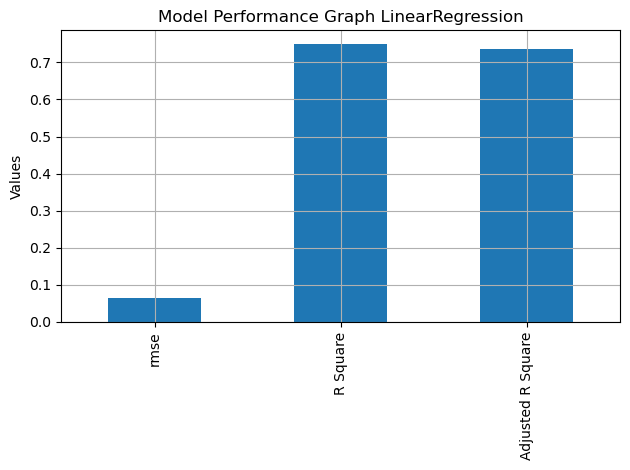

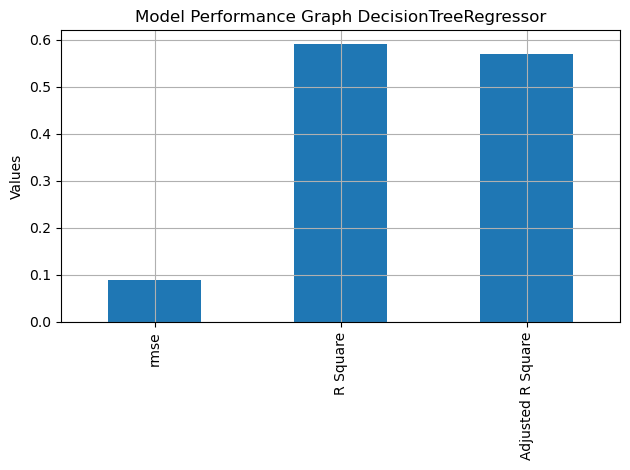

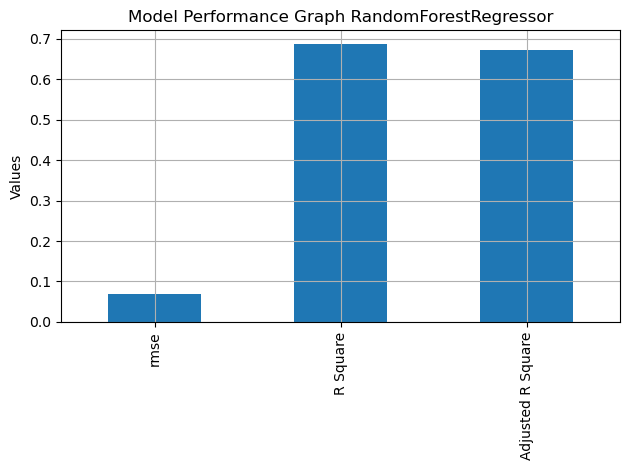

In [44]:
for col in a.columns:
    my_model_plot(col)

In [45]:
rf=RandomForestRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)

In [46]:
rf.fit(x_train,y_train)
rf.predict(x_test)

array([0.63135325, 0.68494266, 0.94379722, 0.72089582, 0.81060063,
       0.67997937, 0.74729272, 0.69237714, 0.79481897, 0.69311679,
       0.66390274, 0.53979345, 0.80999401, 0.78812321, 0.7777074 ,
       0.87513964, 0.66002877, 0.78271828, 0.92185364, 0.67487778,
       0.64930437, 0.75695804, 0.83232278, 0.56983523, 0.79366488,
       0.63296381, 0.95819877, 0.67549889, 0.88478778, 0.66330054,
       0.63156873, 0.83122472, 0.58486725, 0.9155419 , 0.55347089,
       0.80500556, 0.66708   , 0.64917244, 0.67686341, 0.92203856,
       0.57750674, 0.68597822, 0.7356875 , 0.96521321, 0.77445388,
       0.59141492, 0.66029433, 0.66163227, 0.69847631, 0.66550893,
       0.82557833, 0.91649262, 0.91285107, 0.60160798, 0.76565686,
       0.68540575, 0.73018162, 0.63239482, 0.70715813, 0.72405897,
       0.47569911, 0.71381151, 0.72977964, 0.84401369, 0.9624921 ,
       0.62424311, 0.71049533, 0.74472567, 0.93764437, 0.69693579,
       0.61960446, 0.67866329, 0.8103519 , 0.52894857, 0.91748

In [47]:
import pickle
pickle.dump(rf,open("case_study_university.pkl","wb"))